## Генерация данных

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,10,100)
y = 1.5 * x + 2 * np.random.random(100) - 1

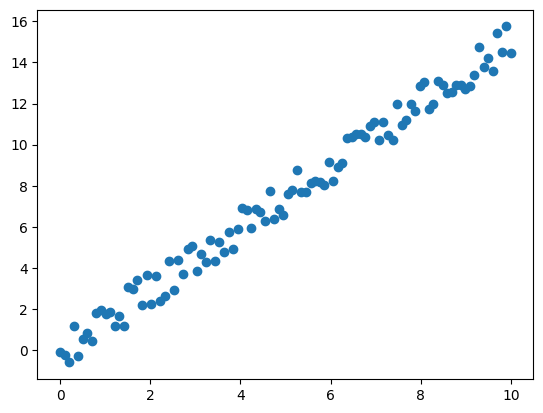

In [ ]:
plt.scatter(x, y)

## Обучение модели линейной регрессии

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

reg = LinearRegression()
reg.fit(x.reshape(-1,1), y)
prediction = reg.predict(x.reshape(-1,1))
print('Mean squared error: ', mean_squared_error(y, prediction))
print('Coefficient of determination (r2): ', r2_score(y, prediction))

Mean squared error:  0.3393955571971038
Coefficient of determination (r2):  0.9827271316508277


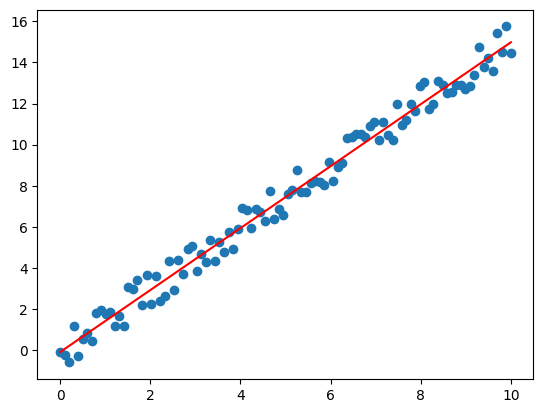

In [ ]:
plt.scatter(x, y)
plt.plot(x.reshape(-1,1), prediction, color="red")

## Сохранение данных в файл

In [ ]:
np.savetxt('y.csv', y, delimiter=',')
np.savetxt('prediction.csv', prediction, delimiter=',')

## Создание скрипта для тестирования качества модели

In [ ]:
%%writefile test_model.py

import pytest
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

@pytest.fixture()
def load_y():
  y = np.loadtxt('y.csv', delimiter=',')
  return y

@pytest.fixture()
def load_prediction():
  prediction = np.loadtxt('prediction.csv', delimiter=',')
  return prediction


def test_mse(load_y, load_prediction):
  assert mean_squared_error(load_y, load_prediction) < 1

def test_r2_score(load_y, load_prediction):
  assert r2_score(load_y, load_prediction) > 0.9


Overwriting test_model.py


## Тестирование качества модели на "чистых" данных

In [ ]:
!pytest -v test_model.py

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.4.4, pluggy-1.5.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.7.1
collected 2 items                                                                                  

test_model.py::test_mse PASSED                                                               [ 50%]
test_model.py::test_r2_score PASSED                                                          [100%]

======================================== 2 passed in 1.02s =========================================


## Датасет с шумом в данных

### Создание зашумлённых данных

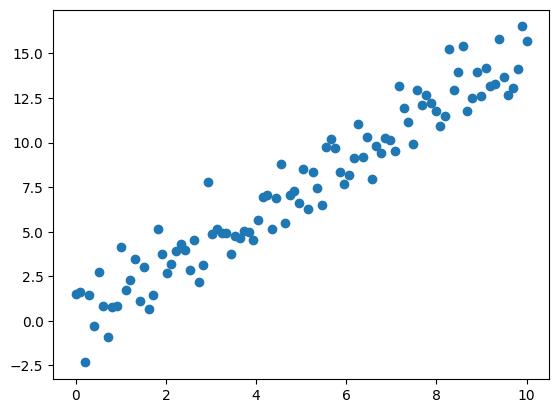

In [ ]:
x = np.linspace(0,10,100)
clear_y = 1.5 * x + 2 * np.random.random(100) - 1
noise = np.random.normal(0, 1, len(x))
y = clear_y + noise
plt.scatter(x, y)

### Обучение модели

In [ ]:
reg = LinearRegression()
reg.fit(x.reshape(-1,1), y)
approx = reg.predict(x.reshape(-1,1))

np.savetxt('y.csv', y, delimiter=',')
np.savetxt('prediction.csv', approx, delimiter=',')

print('Mean squared error: ', mean_squared_error(y, approx))
print('Coefficient of determination (r2): ', r2_score(y, approx))

Mean squared error:  1.4882324060859766
Coefficient of determination (r2):  0.9277260202723179


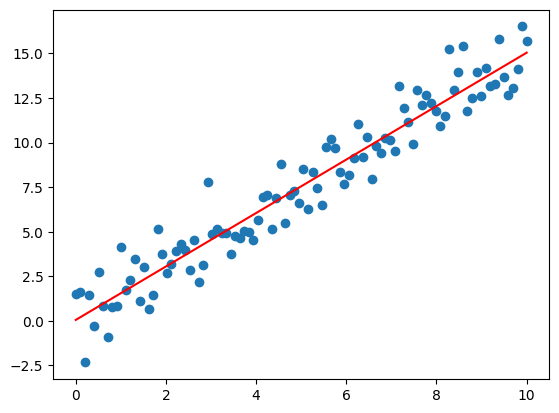

In [ ]:
plt.scatter(x, y)
plt.plot(x.reshape(-1,1), approx, color="red")

### Тестирование качества модели

In [ ]:
!pytest -v test_model.py

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.4.4, pluggy-1.5.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.7.1
collected 2 items                                                                                  

test_model.py::test_mse FAILED                                                               [ 50%]
test_model.py::test_r2_score PASSED                                                          [100%]

============================================= FAILURES =============================================
_____________________________________________ test_mse _____________________________________________

load_y = array([ 1.48321703,  1.61378617, -2.33357277,  1.4380413 , -0.31388487,
        2.76030095,  0.84237982, -0.92665743, ...260048, 13.29934502, 15.80550423, 13.70285472,
       12.69116293, 13.07758631, 14.12873291, 16.51309373, 15.68352125])
